1.上一章内容小结
机器学习：监督学习（线性回归、逻辑回归、神经网络）、无监督学习（k-means）

深度学习模型框架
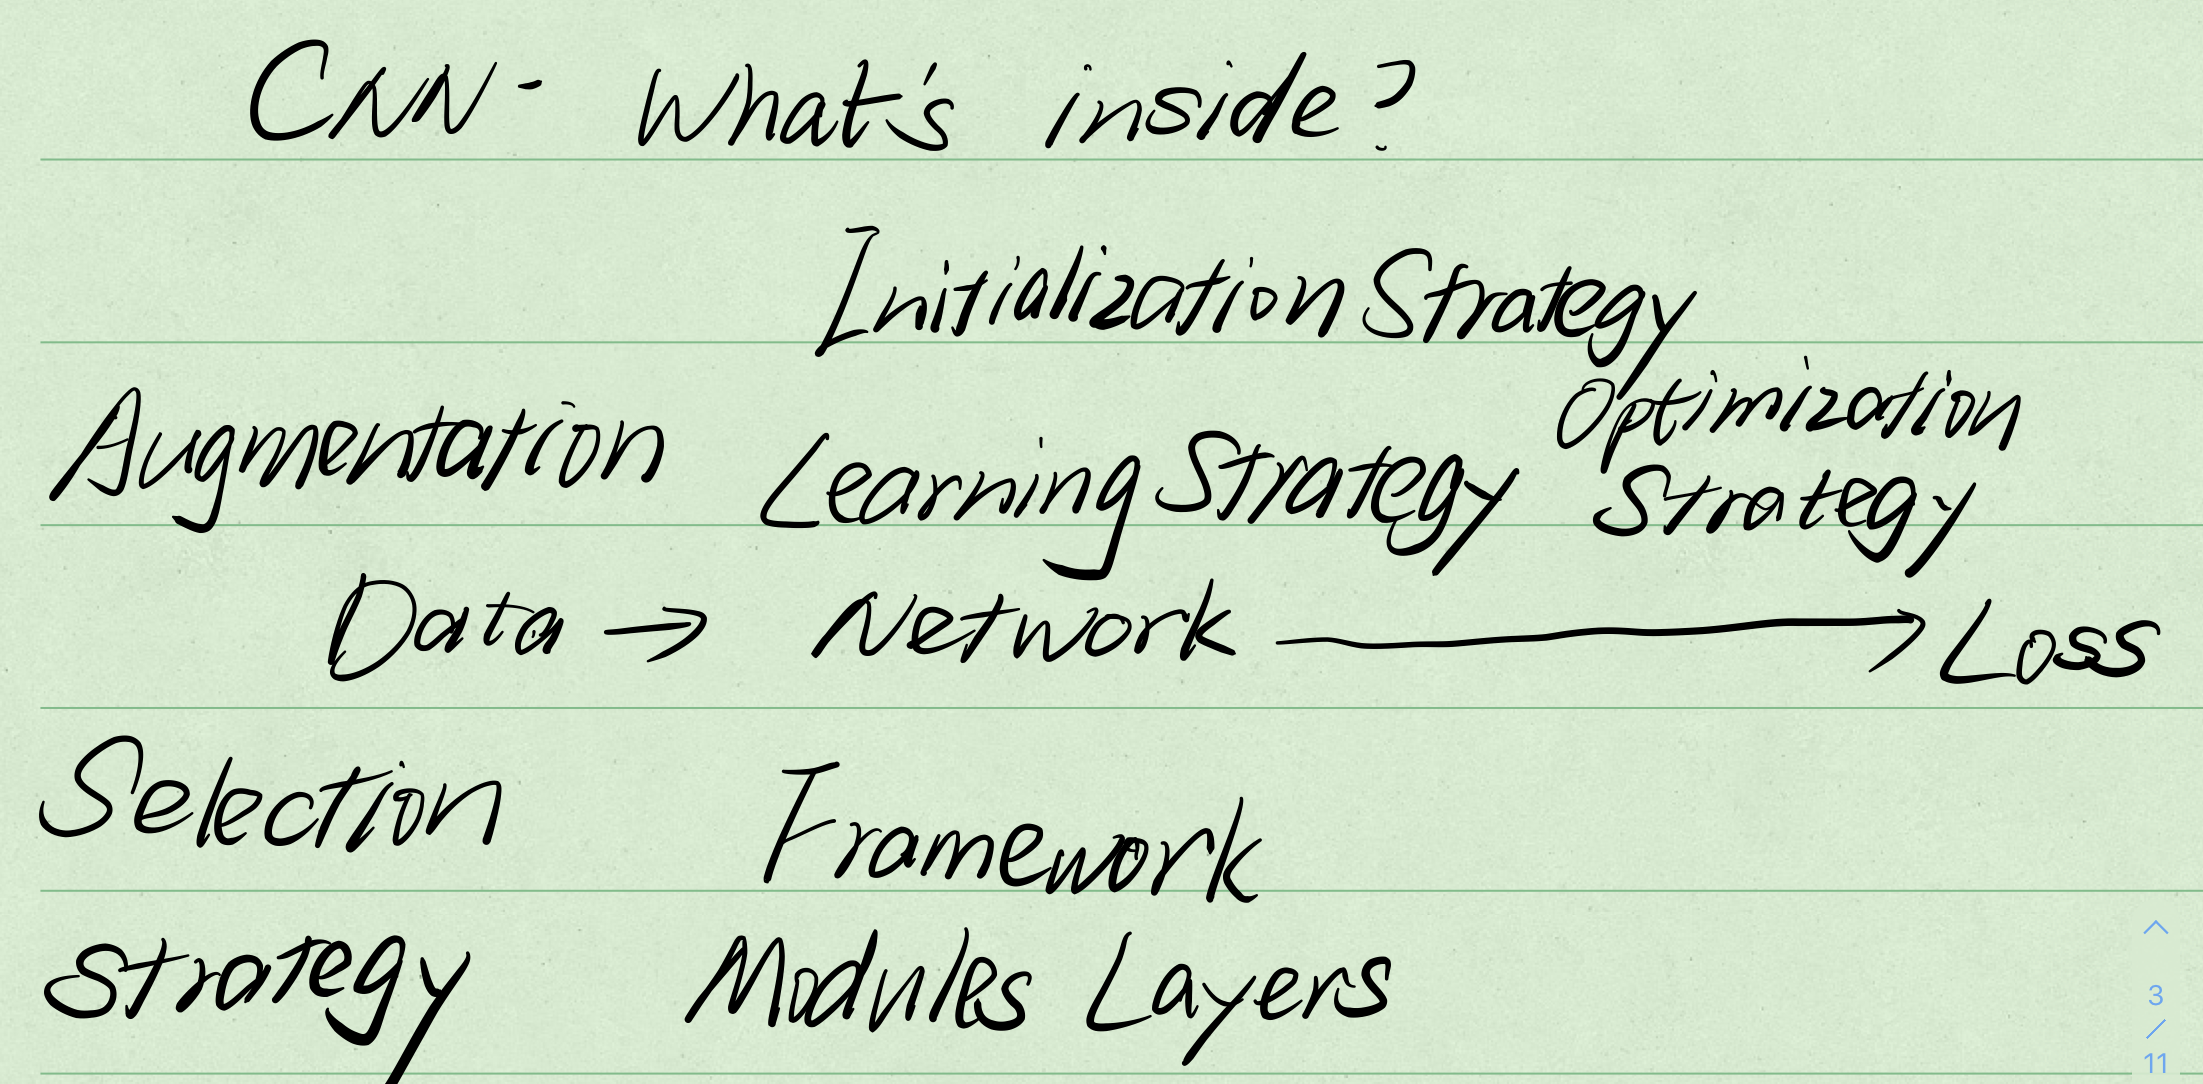

2.图像在计算机中如何存储

numpy数组、shape（BGR）、dtype、0和255、图像坐标系、单通道图片、截图

In [4]:
import numpy as np

np.uint8(255) + np.uint8(1)

<ipython-input-4-49e643a5bcb5>:3: RuntimeWarning: overflow encountered in ubyte_scalars
  np.uint8(255) + np.uint8(1)


0

In [6]:
import cv2

img = cv2.imread('a.png')
cv2.imshow('test', img[:, :, 0])
cv2.imshow('ori', img)
cv2.imshow('part', img[:40, :50, :])
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

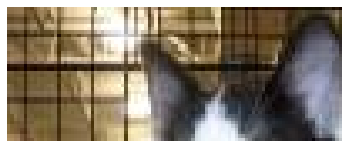

In [11]:
import matplotlib.pyplot as plt

plt.imshow(img[:40, :100, ::-1])
plt.axis('off')
plt.show()

# 二、图像处理

## 2.1 插值算法与几何变换

该部分将对基本的几何变换进行学习，几何变换的原理大多都是相似，只是变换矩阵不同，因此，我们以最常用的平移和旋转为例进行学习。在深度学习领域，我们常用平移、旋转、镜像等操作进行数据增广；在传统CV领域，由于某些拍摄角度的问题，我们需要对图像进行矫正处理，而几何变换正是这个处理过程的基础，因此了解和学习几何变换也是有必要的。

### 2.1.1 仿射变换

仿射变换矩阵：

$$
\begin{bmatrix}x \\y\\1\end{bmatrix} 
=\begin{bmatrix}
a_0 &a_1 & a_2 \\
a_3 & a_4 & a_5 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}
$$

其中$x$，$y$表示输出图像像素的坐标，$x_0$,$y_0$表示输入图像像素的坐标

<div align=center><img width="30%" height="30%" src="https://img-blog.csdnimg.cn/20200412101740312.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zOTk0MDUxMg==,size_16,color_FFFFFF,t_70#pic_center"/></div>

&emsp;&emsp;如下图所示，将一幅3X3的图像放大到4X4，用$d(x, y)$表示目标图像，$s(x, y)$表示原图像，我们有如下公式：

$$
\begin{array}{c}
d(dst_{X}, dst_{Y}) = s(\frac{dst_{X}src_{Width}}  {dst_{Width}}, \frac{dst_{Y}src_{Height}} {dst_{Height}})
\end{array}
$$

$$
\begin{array}{c}
d(0,0)=s(0,0) \\
d(0,1)=s(0,0.75)=s(0,1) \\
d(0,2)=s(0,1.50)=s(0,2) \\
d(0,3)=s(0,2.25)=s(0,2) \\
...\\
\end{array}
$$

<div align=center><img width="50%" height="50%" src="https://img-blog.csdnimg.cn/20200412101854853.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zOTk0MDUxMg==,size_16,color_FFFFFF,t_70#pic_center"/></div>

**缺点：**
用该方法作放大处理时，在图象中可能出现明显的块状效应


<div align=center><img width="150" height="150" src="https://img-blog.csdnimg.cn/20200412102932888.png#pic_center"/></div>


|变换名称| $a_0$ |  $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ |
|-|-|-|-|-|-|-|
| 平移 | 1 |0| $\triangle x$| 0 |1|$\triangle y$
| 均匀缩放 |  $s$|0| 0| 0 |$s$|0
|  不均匀缩放| $s_x$ |0|0 |0  |$s_y$|0
| 顺时针旋转角度$\theta$ |  $cos\theta$|$sin\theta$|0 | $-sin\theta$ |$cos\theta$|0
| 逆时针旋转角度$\theta$ |  $cos\theta$|$-sin\theta$|0 | $sin\theta$ |$cos\theta$|0
|  垂直偏移变换| 1 |0| 0| h |1|0
|  水平偏移变换| 1 |h| 0| 0 |1|0 

例子：

原图如下：
<div  align="center">    
<img src="https://img-blog.csdnimg.cn/20200422224925719.png" width = "40%" />
</div>

1. 放大为原来的两倍
$$
\begin{bmatrix}x \\y\\1\end{bmatrix} 
=\begin{bmatrix}
2 &0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}
$$

<div  align="center">    
<img src="https://img-blog.csdnimg.cn/20200422230159292.png" width = "40%" />
</div>


In [ ]:
from tensorbay import GAS
from tensorbay.dataset import Segment
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Authorize a GAS client.
gas = GAS('Accesskey-dac95e0d8e685ef4d5f8b80d51e38499')

# Get a dataset client.
dataset_client = gas.get_dataset("DogsVsCats-2")

# List dataset segments.
segments = dataset_client.list_segment_names()

# Get a segment by name
segment = Segment("train", dataset_client)
fp = segment[4].open()
with open("a.png", "wb") as f:
    f.write(fp.read()) 

In [47]:
def resize_front_nearest(src, s):
    h, w = src.shape
    dest_h, dest_w = int(h*s), int(w*s)
    dest = np.zeros((int(dest_h), int(dest_w)))
    for i in range(h):
        for j in range(w):
            dest_i, dest_j = int(s*i), int(s*j)
            dest[dest_i, dest_j] = src[i, j]
    return dest

In [14]:
def resize_back_nearest(src, s):
    h, w = src.shape
    dest_h, dest_w = int(h*s), int(w*s)
    dest = np.zeros((int(dest_h), int(dest_w), 3))
    for i in range(dest_h):
        for j in range(dest_w):
            src_i, src_j = int(1/s*i), int(1/s*j)
            dest[i, j] = src[src_i, src_j]
    return dest

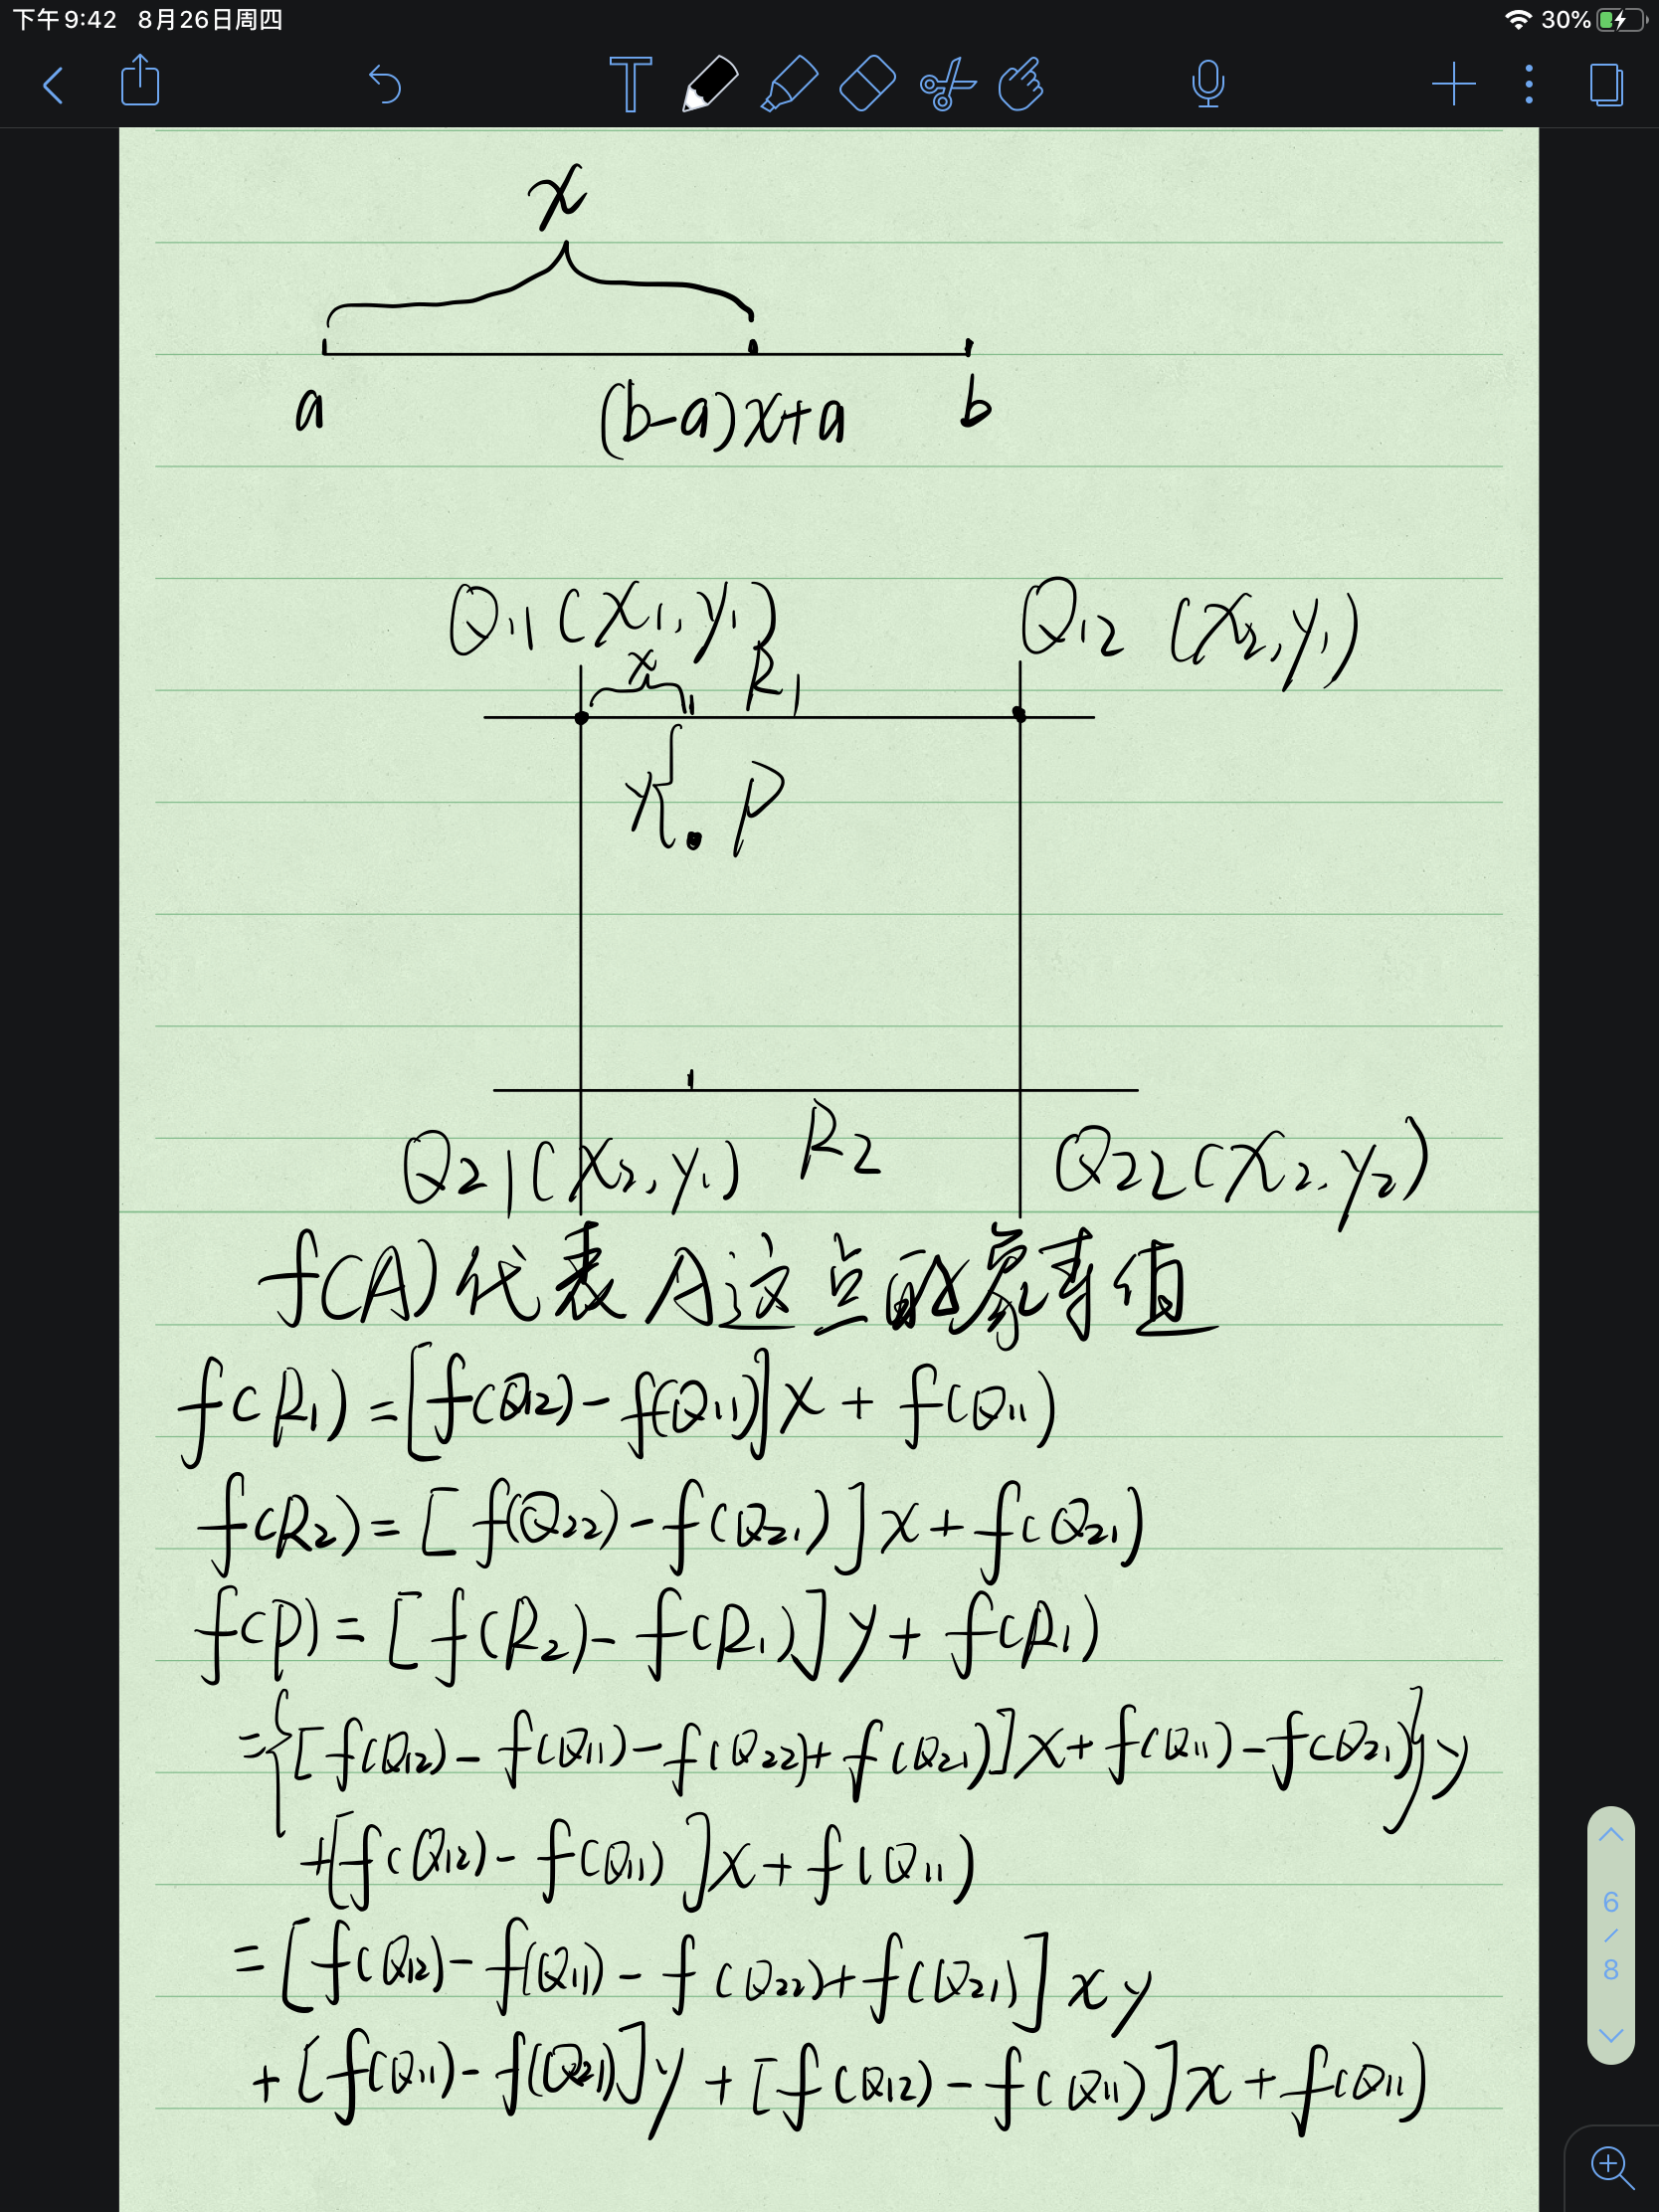

In [15]:
def resize_back_linear(src, s):
    h, w = src.shape
    dest_h, dest_w = int(h*s), int(w*s)
    dest = np.zeros((int(dest_h), int(dest_w), 3))
    for i in range(dest_h):
        for j in range(dest_w):              
            src_i, src_j = 1/s*i , 1/s*j
            x = src_j-int(src_j)
            y = src_i-int(src_i)
            if src_i >= (h-1):
                y, y0, y1 = 0, h-1, h-1
            else:
                y0, y1 = int(src_i), int(src_i)+1
            if src_j >= (w-1):
                x, x0, x1 = 0, w-1, w-1
            else:
                x0, x1 = int(src_j), int(src_j)+1
            f_00 = src[y0, x0]
            f_01 = src[y1, x0]
            f_10 = src[y0, x1]
            f_11 = src[y1, x1]
            dest[i, j] = (f_10-f_00)*x + (f_01-f_00)*y + (f_11+f_00-f_01-f_10)*x*y + f_00
    return dest

In [18]:
img = cv2.imread('a.png', 0).astype(float)
resized_img_n = resize_back_nearest(img, 5).astype(np.uint8)
resized_img_l = resize_back_linear(img, 5).astype(np.uint8)
# resized_img_l = cv2.resize(resized_img_l, dsize=None, fx=5, fy=5, interpolation = cv2.INTER_LINEAR)
# resized_img_n = cv2.resize(resized_img_n, dsize=None, fx=5, fy=5, interpolation = cv2.INTER_NEAREST)
cv2.imshow('origin', img)
cv2.imshow('nearest', resized_img_n)
cv2.imshow('linear', resized_img_l)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

<ipython-input-15-be25322ff56b>:22: RuntimeWarning: overflow encountered in ubyte_scalars
  dest[i, j] = (f_10-f_00)*x + (f_01-f_00)*y + (f_11+f_00-f_01-f_10)*x*y + f_00


2. 向上平移一个单位向右平移一个单位
$$
\begin{bmatrix}x \\y\\1\end{bmatrix} 
=\begin{bmatrix}
1 &0 & 1 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}
$$


<div  align="center">    <img src="https://img-blog.csdnimg.cn/20200422225300652.png" width = "40%" /></div>

3. 顺时针旋转45度

$$
\begin{bmatrix}x \\y\\1\end{bmatrix} 
=\begin{bmatrix}
\sqrt2/2 &\sqrt2/2 & 0 \\
-\sqrt2/2 & \sqrt2/2 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}
$$

<div  align="center">    
<img src="https://img-blog.csdnimg.cn/20200422231055464.png" width = "40%" />
</div>

4. 水平偏移两个单位

$$
\begin{bmatrix}x \\y\\1\end{bmatrix} 
=\begin{bmatrix}
1 & 2 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}
$$

<div  align="center">    
<img src="https://img-blog.csdnimg.cn/20200422232721460.png" width = "40%" />
</div>

### 2.1.2 图像旋转、偏移相关问题

**问题1：**

对于缩放、平移可以以图像坐标原点（图像左上角为原点）为中心变换，这不用坐标系变换，直接按照一般形式计算即可。而对于旋转和偏移，一般是以图像中心为原点，那么这就涉及坐标系转换了。

我们都知道，图像坐标的原点在图像左上角，水平向右为 X 轴，垂直向下为 Y 轴。数学课本中常见的坐标系是以图像中心为原点，水平向右为 X 轴，垂直向上为 Y 轴，称为笛卡尔坐标系。看下图:  

<div  align="center">    
<img src="https://img-blog.csdnimg.cn/2020042320032039.png" width = "40%" />
</div>

因此，对于旋转和偏移，就需要3步（3次变换）：

* 将输入原图图像坐标转换为笛卡尔坐标系；
* 进行旋转计算。旋转矩阵前面已经给出了；
* 将旋转后的图像的笛卡尔坐标转回图像坐标。

先看下图：  

<div  align="center">    
<img src="https://img-blog.csdnimg.cn/20200423200259503.png" width = "40%" />
</div>



在图像中我们的坐标系通常是AB和AC方向的,原点为A，而笛卡尔直角坐标系是DE和DF方向的，原点为D。

**令图像表示为M×N的矩阵，对于点A而言，两坐标系中的坐标分别是(0，0)和$(-N/2,M/2)$，则图像某像素点$(x',y')$转换为笛卡尔坐标$（x,y）$转换关系为，$x$为列，$y$为行：**   


$$x=x'-\frac{N}{2}$$

$$y=-y'-\frac{M}{2}$$

逆变换为：  

$$x'=x+\frac{N}{2}$$

$$y'=-y+\frac{M}{2}$$


&emsp;&emsp;于是，根据前面说的3个步骤（3次变换），旋转(顺时针旋转)的变换形式就为，3次变换就有3个矩阵：  

$$
\begin{bmatrix}x \\y\\1\end{bmatrix} 
=\begin{bmatrix}
1&0 & -0.5\cdot N  \\
0 & -1 & -0.5 \cdot M \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
cos\theta&sin\theta & 0  \\
-sin\theta & cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1&0 & 0.5\cdot N  \\
0 & -1 & 0.5 \cdot M \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}$$

即：
$$
\begin{bmatrix}x \\y\\1\end{bmatrix} =
\begin{bmatrix}
cos\theta&-sin\theta & -0.5N(1-cos\theta)+0.5Msin\theta  \\
sin\theta & -cos\theta & -0.5M(1-sin\theta)-0.5Mcos\theta \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}$$

**问题2**

![在这里插入图片描述](https://img-blog.csdnimg.cn/20200423215953218.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0MzE1OTg3,size_16,color_FFFFFF,t_70)


可以看到，图像的一部分被截断了，其原因是：

1. 旋转过后的图像大小应该发生变化才能装下旋转后的图片
2. OpenCv将坐标转成笛卡尔坐标系后没转回图像坐标系


其中比较难理解的是图像大小的变换，下面举一个例子大家就能明白了：

![在这里插入图片描述](https://img-blog.csdnimg.cn/20200423205654880.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQ0MzE1OTg3,size_16,color_FFFFFF,t_70)



如图：ABCD是变换前矩形，EFGH是变换后的矩形，变换的矩阵表示为：

$$
\begin{bmatrix}x \\y\\1\end{bmatrix} 
=\begin{bmatrix}
cos\theta &sin\theta & 0 \\
-sin\theta & cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
y_0 \\
1
\end{bmatrix}$$

即表达式为：

$$x=cos\theta x_0+sin\theta y_0$$

$$y=-sin\theta x_0 +cos\theta y_0$$

&emsp;&emsp;所以，要算旋转后图片的大小，只需计算原图像四个顶点变换后的图像所确定的外接矩形长宽。因为经过坐标变换后的图像是关于原点对称的，所以计算D点变换后的横坐标的绝对值乘2，就是变换后矩形的长，计算A点变换后的纵坐标的绝对值乘2，就是变换后矩形的宽

设原图像长为$2a$，宽为$2b$，变换后的图像长宽为$c$，$d$，则$A$点的坐标为：$(-a, b)$， $D$点坐标：$(a, b)$

$$c = 2*(a| cos\theta  | + b|sin\theta  |)$$

$$d = 2 * (a|sin\theta | + b|cos\theta |)$$